In [229]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [230]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [231]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [232]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [233]:
caminho_arquivo_csv = 'tabela_filtrada.csv'
tabela_filtrada = pd.read_csv(caminho_arquivo_csv)


media_idade = tabela_filtrada['Age'].mean()
print(round(media_idade,2))

25.99


In [234]:
tabela_filtrada

,Unnamed: 0,Entry ID,Name,Gender,Age,Team,NOC,Year,Season,City,Sport,Event,Medal
0,3,3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,12,37,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,13,38,Arvo Ossian Aaltonen,Male,30.0,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,15,41,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
4,16,42,Paavo Johannes Aaltonen,Male,28.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41495,286078,270641,Sergey Mikhaylovich Zubov,Male,21.0,Unified Team,EUN,1992,Winter,Albertville,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold
41496,286122,270827,Matja Zupan,Male,19.0,Yugoslavia,YUG,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
41497,286154,270876,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Downhill,Gold
41498,286156,270878,Pirmin Zurbriggen,Male,25.0,Switzerland,SUI,1988,Winter,Calgary,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze


In [235]:
mediana_idade = tabela_filtrada['Age'].median()
print(round(mediana_idade,2))

25.0


In [236]:
moda_idade = tabela_filtrada['Age'].mode()
print(moda_idade)

0    23.0
Name: Age, dtype: float64


In [237]:
dispercao_idades = tabela_filtrada['Age'].describe() #desvio padrão
print(round(dispercao_idades,2))

count    41500.00
mean        25.99
std          5.88
min         10.00
25%         22.00
50%         25.00
75%         29.00
max         73.00
Name: Age, dtype: float64


In [238]:
tabela_filtrada["Team"].value_counts() #ranking medalhas

Team
United States    5503
Soviet Union     2451
Germany          2051
Great Britain    1770
France           1661
                 ... 
Barbados            1
Scamasaxe-3         1
Scamasaxe-2         1
Brynhild-2          1
Guatemala           1
Name: count, Length: 489, dtype: int64

In [239]:
ouro = tabela_filtrada[tabela_filtrada['Medal'] == 'Gold'] #total de ouro
ouro['Team'].value_counts()

Team
United States    2585
Soviet Union     1058
Germany           697
Italy             556
Great Britain     556
                 ... 
Costa Rica          1
Panama              1
Singapore           1
Syria               1
Tajikistan          1
Name: count, Length: 240, dtype: int64

In [240]:
ouro_brasil = tabela_filtrada[(tabela_filtrada['Medal'] == 'Gold') & (tabela_filtrada["Team"]== "Brazil")] #brasil ouro
ouro_brasil.shape[0]

132

In [241]:
total_medalhas_brasil = tabela_filtrada[tabela_filtrada["Team"] == "Brazil"].shape[0]
print(total_medalhas_brasil)

503


In [242]:
media_brasil = total_medalhas_brasil/32
print(round(media_brasil,2))

15.72


In [243]:
filtro_brasil = tabela_filtrada[tabela_filtrada['Team']=='Brazil']
media_idade_brasil = filtro_brasil['Age'].mean()
print(round(media_idade_brasil, 2))

25.66


<Axes: xlabel='Age'>

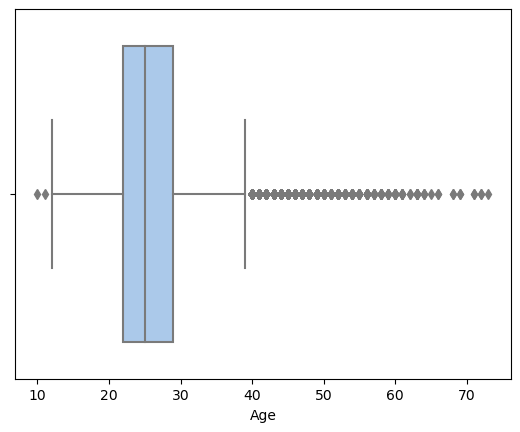

In [244]:
sns.boxplot(data = tabela_filtrada, x = "Age")

In [245]:
caminho_arquivo_regions = "all_regions.csv"

In [246]:
caminho_arquivo_athlete_games = "tabela_filtrada.csv"

In [247]:
df_regions = pd.read_csv(caminho_arquivo_regions)

In [248]:
df_athlete_games = pd.read_csv(caminho_arquivo_athlete_games)

In [249]:
total_medalhas = df_athlete_games.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)
total_medalhas['Total'] = total_medalhas.sum(axis=1)

In [250]:
total_medalhas = total_medalhas[total_medalhas['Total'] > 0]

In [251]:
ranking = total_medalhas.sort_values(by='Total', ascending=False)

In [252]:
top_32 = ranking.head(32)

In [253]:
sns.set_palette("pastel")

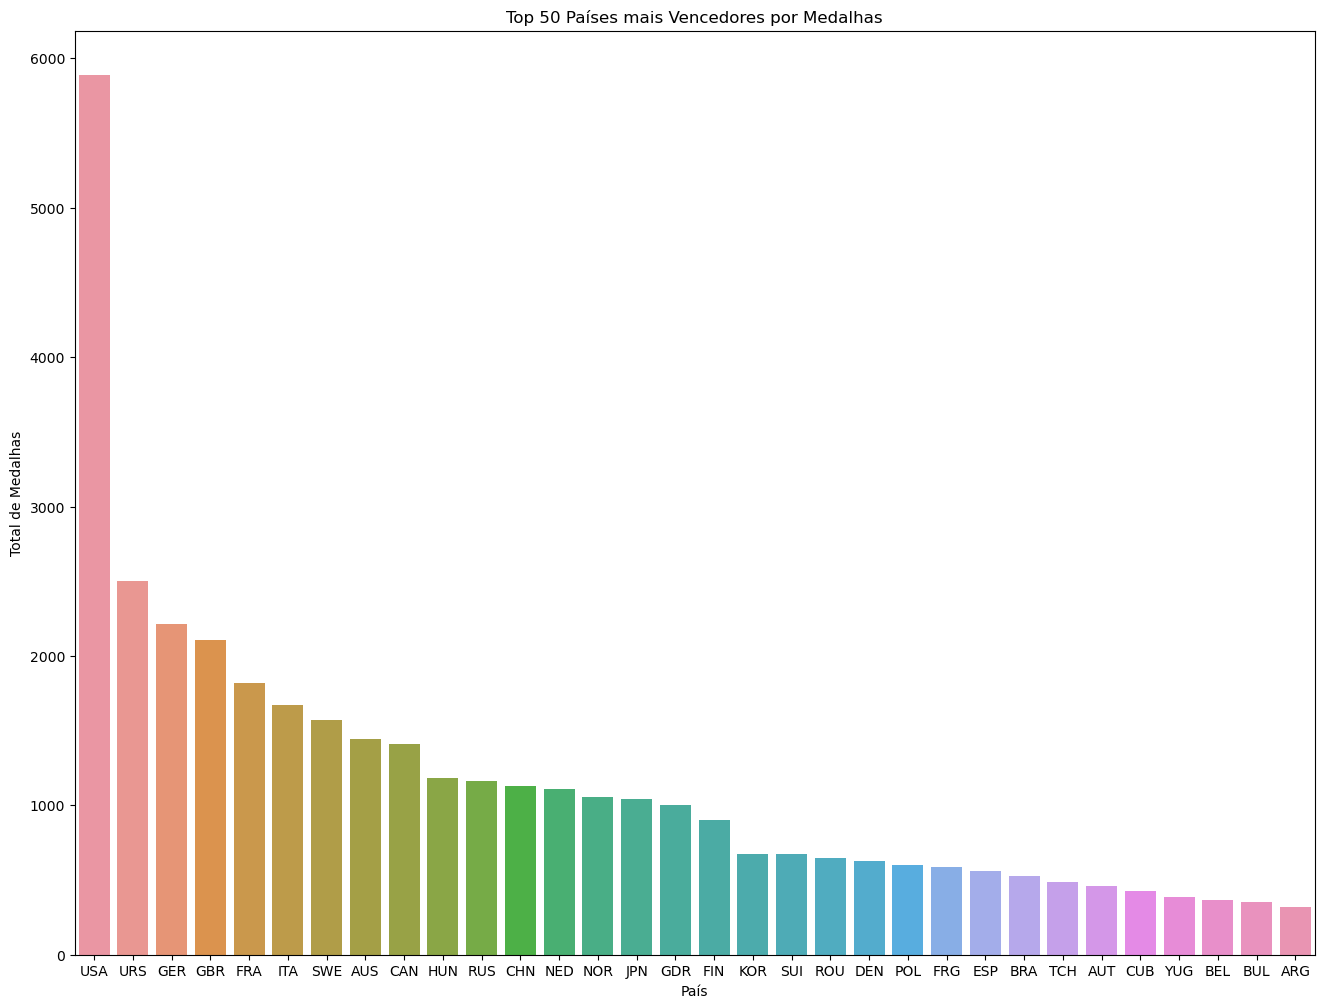

In [254]:
plt.figure(figsize=(16, 12))
sns.barplot(x=top_32.index, y='Total', data=top_32)
plt.ylabel('Total de Medalhas')
plt.xlabel('País')
plt.title('Top 50 Países mais Vencedores por Medalhas')
plt.show()

In [255]:
mapeamento_medalhas = {'Nan': 0, 'Bronze': 1, 'silver': 2, 'Ouro': 3}

In [276]:
caminho_arquivo_all = 'all_athlete_games.csv'       
df_todos_atletas = pd.read_csv(caminho_arquivo_all)


In [277]:
mapeamento_medalhas = {'Nenhuma': 1, 'Bronze': 2, 'Silver': 3, 'Gold': 4}
df_todos_atletas['Medalhas_numericas'] = np.where(df_todos_atletas['Medal'].notnull(), 1, 0) 
df_todos_atletas['Medalhas_numericas'] = df_todos_atletas['Medal'].map(mapeamento_medalhas)


In [278]:
df_todos_atletas = df_todos_atletas.dropna(subset=['Age']) #retira atletas sem informação de idade
df_todos_atletas['Age'] = df_todos_atletas['Age'].astype(int)

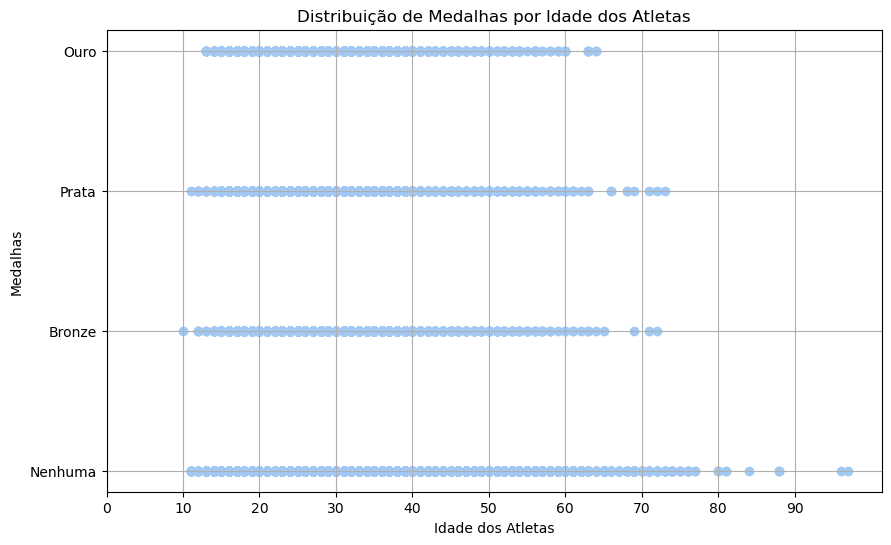

In [279]:
df_todos_atletas['Medalhas_numericas'].fillna(1, inplace=True) #vai substituir os Nan por 1


plt.figure(figsize=(10, 6)) 
plt.scatter(df_todos_atletas['Age'], df_todos_atletas['Medalhas_numericas'], alpha=1.0)
plt.xticks(ticks=range(0, df_todos_atletas['Age'].max(), 10))

plt.xlabel('Idade dos Atletas') 
plt.ylabel('Medalhas')
plt.title('Distribuição de Medalhas por Idade dos Atletas')
plt.yticks(ticks=[1, 2, 3, 4], labels=['Nenhuma', 'Bronze', 'Prata', 'Ouro'])
plt.grid(True)
plt.show()


In [289]:
df_ordenado = df_todos_atletas.sort_values(by='Age', ascending=False)

mais_velho = df_ordenado.iloc[1]
penultimo_mais_velho = df_ordenado.iloc[0]

#### Os dois atletas "mais velhos". Ambos nem estavam vivos quando participaram, pois os dois morreram em 1910, mas suas obras concorreram na olimpiadas, no esporte de competição de artes, e acabaram por contabilizar as suas idades a partir de quantos anos eles teriam quando suas obras ganharam


In [291]:
print("Penúltimo mais velho:")
print(penultimo_mais_velho)
print("\nMais velho:")
print(mais_velho)

Penúltimo mais velho:
Entry ID                                                   257054
Name                                       John Quincy Adams Ward
Gender                                                       Male
Age                                                            97
Team                                                United States
NOC                                                           USA
Year                                                         1928
Season                                                     Summer
City                                                    Amsterdam
Sport                                            Art Competitions
Event                 Art Competitions Mixed Sculpturing, Statues
Medal                                                         NaN
Medalhas_numericas                                            1.0
Name: 211066, dtype: object

Mais velho:
Entry ID                                                       98118
Name      

In [334]:
contagem_cidades_por_ano = df_todos_atletas.groupby(['City', 'Year']).size()
contagem_cidades = contagem_cidades_por_ano.groupby('City').size()
cores = np.random.rand(len(top_10_cidades), 3)


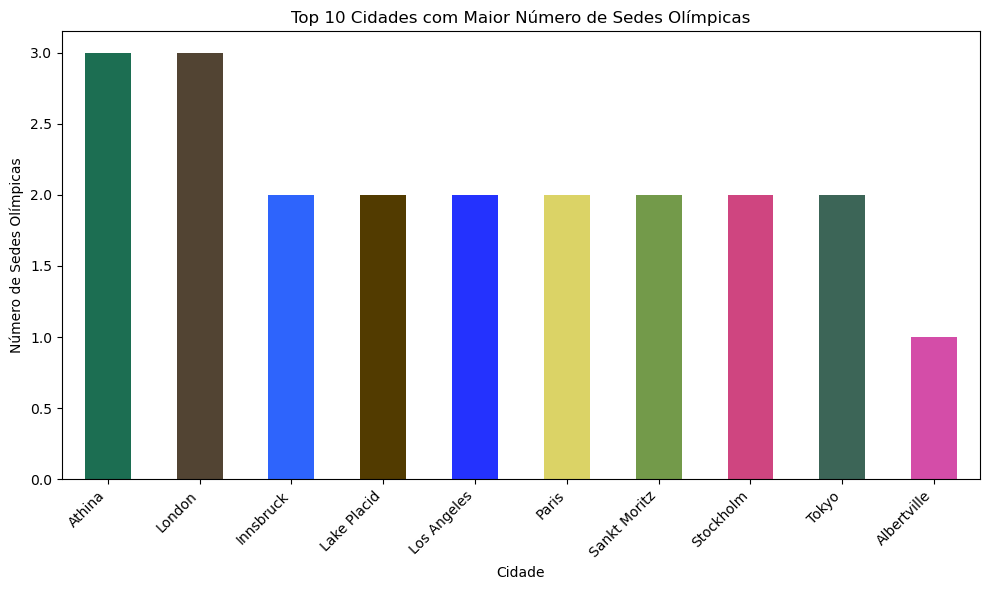

In [335]:
top_10_cidades = contagem_cidades.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_cidades.plot(kind='bar', color=cores)
plt.xlabel('Cidade')
plt.ylabel('Número de Sedes Olímpicas')
plt.title('Top 10 Cidades com Maior Número de Sedes Olímpicas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [264]:
correlacao_idade_medalhas = df_todos_atletas['Age'].corr(df_todos_atletas['Medalhas_numericas'])


In [265]:
correlacao_idade_medalhas

0.02250109201202069

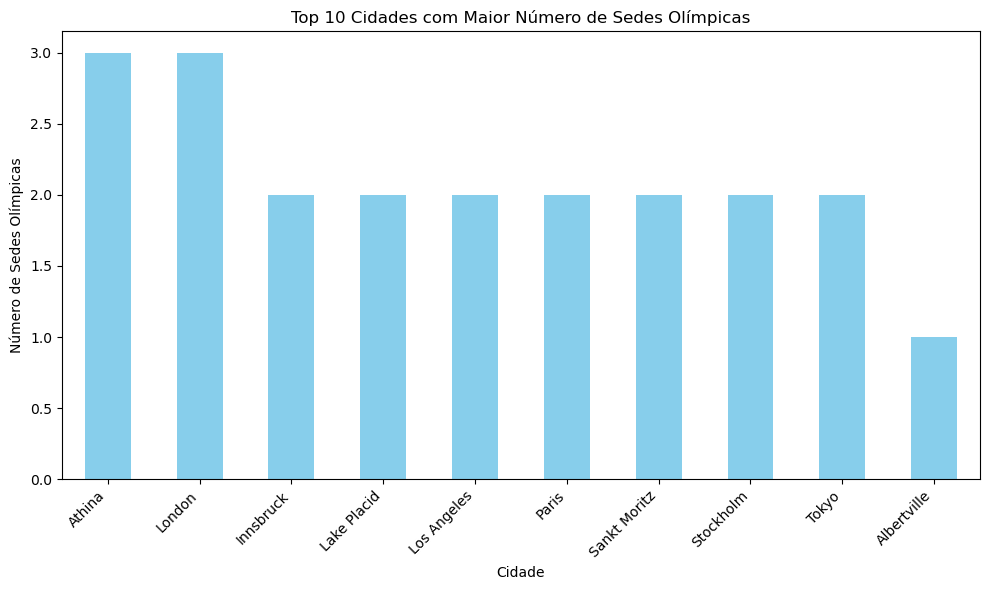

In [331]:
contagem_cidades_por_ano = df_todos_atletas.groupby(['City', 'Year']).size()

# Para cada cidade, conta o número de anos diferentes em que ela aparece
contagem_cidades = contagem_cidades_por_ano.groupby('City').size()

# Seleciona as 10 cidades com mais aparições
top_10_cidades = contagem_cidades.nlargest(10)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
top_10_cidades.plot(kind='bar', color='skyblue')

# Adiciona rótulos e título
plt.xlabel('Cidade')
plt.ylabel('Número de Sedes Olímpicas')
plt.title('Top 10 Cidades com Maior Número de Sedes Olímpicas')

# Exibe o gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()